<a href="https://colab.research.google.com/github/s-whynot/BearingFaultMFPT-repo/blob/master/BearingFault_MFPT_file_loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from os import listdir
from os.path import isfile, join

import scipy.io as sio
import tables

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


MFPT dataset with the Nominal "No Fault" Data
3 Baseline conditions -

1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz


In [ ]:
file_path = 'drive/My Drive/MFPT Fault Data Sets/1 - Three Baseline Conditions/'
onlyfiles = [f for f in listdir(file_path) if isfile(join(file_path, f))]
print(onlyfiles)

['baseline_2.mat', 'baseline_3.mat', 'baseline_1.mat']


In [ ]:
#Function for converting array to list
def arrtolistgdataB(matarr):
  p11 = matarr['bearing'][:,0]['gs'].tolist()
  return p11[0].tolist()

In [ ]:
#Function for converting array to list
def arrtolistgdataALT(matarr):
  p11 = matarr['bearing'][:,0]['gs']
  return p11[0]

In [ ]:
#Reading data from folder
merged_G_3BL_data = pd.DataFrame()
for filename in os.listdir(file_path):
     if filename.endswith('.mat'):
       print(filename)
       datadict = sio.loadmat(os.path.join(file_path, filename))
       time1 = datadict['__header__'][50:]
       Gdata1 = arrtolistgdataALT(datadict)
       #merged_G_3BL_data["Load"] = "Fixed"
       #merged_G_3BL_data[time1] = Gdata

baseline_2.mat
baseline_3.mat
baseline_1.mat


In [ ]:
p1 = datadict['bearing']['sr'].tolist()
psr1 = p1[0][0][0][0]
print("The Sampling Rate in Hz: ", psr1)

The Sampling Rate in Hz:  97656


In [ ]:
#display(merged_G_3BL_data.loc[['apply(lambda x: pd.Series(x[0]))
display(merged_G_3BL_data.head())
display(Gdata1)

""


array([[ 0.8315881],
       [ 0.0387017],
       [ 0.4676445],
       ...,
       [-0.8111974],
       [-0.3338806],
       [-0.4876291]])

1/10th of a sampling rate of 97656 Hz is 9765.6 Hz or 9.7656 kHz.
Sampling rate is per second.
So plotting done for 1/10th of a second.

range(0, 9765)

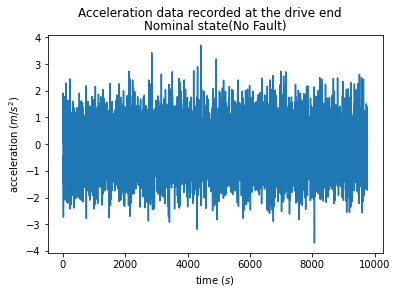

In [ ]:
range_of_samples = range(0, int(psr1/10))
display(range_of_samples)
plt.xlabel("time $(s)$")
plt.ylabel("acceleration $(m/s^2)$")
plt.title('Nominal state(No Fault)')
plt.plot(Gdata1[range_of_samples])
plt.suptitle('Acceleration data recorded at the drive end')
plt.show()

In [ ]:
p111 = datadict['bearing'][:, 0]['load'].tolist()
print("Baseline Data for a Constant load in lbs: ", p111[0].tolist()[0][0])

Baseline Data for a Constant load in lbs:  270


MFPT Dataset with 3 Outer Race(OR) conditions - 
1.   constant load of 270 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 97.656 kHz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#The files present in the folder
file_path2 = 'drive/My Drive/MFPT Fault Data Sets/2 - Three Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path2) if isfile(join(file_path2, f))]
print(onlyfiles)

['cyclostat.tif', 'OuterRaceFault_1.mat', 'OuterRaceFault_2.mat', 'OuterRaceFault_3.mat']


In [ ]:
#Not working not needed the general one works now for both 23-08-2020
#def arrtolistgdata(matarr):
  #p22 = matarr['bearing']['gs'].tolist()
  #return p22[0]

In [ ]:
merged_G_3OR_data = pd.DataFrame()
for filename2 in os.listdir(file_path2):
     if filename2.endswith('.mat'):
       print(filename2)
       datadict2 = sio.loadmat(os.path.join(file_path2, filename2))
       time2 = datadict2['__header__'][50:]
       Gdata2 = arrtolistgdataB(datadict2)
       merged_G_3OR_data[time2] = Gdata2
       merged_G_3OR_data["Load"] = "Fixed"

OuterRaceFault_1.mat
OuterRaceFault_2.mat
OuterRaceFault_3.mat


In [ ]:
display(merged_G_3OR_data.head())

,b'Thu Jan 17 13:17:11 2013',Load,b'Thu Jan 17 13:17:26 2013',b'Thu Jan 17 13:17:38 2013'
0,[1.301891],Fixed,[0.3083091],[0.718744]
1,[-0.6672074],Fixed,[-0.1723548],[0.4493211]
2,[-0.4034944],Fixed,[0.8998852],[-0.975775]
3,[0.8490131],Fixed,[0.6174551],[-0.6292318]
4,[-1.690778],Fixed,[-0.01603444],[-0.8415681]


MFPT Dataset with 7 Outer Race(OR) conditions - 
1.   Variable load of 25, 50, 100, 150, 200, 250 and 300 lbs 
2.   Input Shaft Rate of 25 Hz
3.   Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path3 = 'drive/My Drive/MFPT Fault Data Sets/3 - Seven More Outer Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path3) if isfile(join(file_path3, f))]
print(onlyfiles)

['OuterRaceFault_vload_3.mat', 'OuterRaceFault_vload_2.mat', 'OuterRaceFault_vload_1.mat', 'OuterRaceFault_vload_5.mat', 'OuterRaceFault_vload_4.mat', 'OuterRaceFault_vload_6.mat', 'OuterRaceFault_vload_7.mat']


In [ ]:
merged_G_7OR_data = pd.DataFrame()
for filename3 in os.listdir(file_path3):
     if filename3.endswith('.mat'):
       print(filename3)
       datadict3 = sio.loadmat(os.path.join(file_path3, filename3))
       time3 = datadict3['__header__'][50:]
       Gdata3 = arrtolistgdataB(datadict3)
       merged_G_7OR_data[time3] = Gdata3
       p333 = datadict3['bearing']['load'].tolist()
       display(p333[0][0][0])
       merged_G_7OR_data["Load"] = "Variable"

OuterRaceFault_vload_3.mat


'100'

OuterRaceFault_vload_2.mat


'50'

OuterRaceFault_vload_1.mat


'25'

OuterRaceFault_vload_5.mat


'200'

OuterRaceFault_vload_4.mat


'150'

OuterRaceFault_vload_6.mat


'250'

OuterRaceFault_vload_7.mat


'300'

In [ ]:
display(merged_G_7OR_data.head())
#display(pd.unique(merged_G_7OR_data['Load (lbs)']))
#display(datadict3)

,b'Thu Jan 17 13:15:15 2013',Load,b'Thu Jan 17 13:14:58 2013',b'Thu Jan 17 13:15:05 2013',b'Thu Jan 17 13:15:37 2013',b'Thu Jan 17 13:15:26 2013',b'Thu Jan 17 13:15:51 2013',b'Thu Jan 17 13:16:03 2013'
0,[-1.151945],Variable,[-0.1909366],[-0.06989686],[-0.08516835],[-0.6417344],[-0.5492564],[0.7525849]
1,[0.5270445],Variable,[0.3785875],[1.184481],[0.7314805],[-1.733873],[0.1693891],[-1.331141]
2,[0.169586],Variable,[-0.4904225],[1.568139],[0.2428916],[-0.896255],[-0.4707209],[-1.530163]
3,[-1.615467],Variable,[-1.442238],[0.1725271],[-0.2936284],[0.5547817],[-0.5062723],[-2.426922]
4,[-0.200129],Variable,[-0.05172122],[1.150886],[-0.3597473],[0.0157391],[0.2941206],[-2.074312]


In [ ]:
p3 = datadict3['bearing']['sr'].tolist()
psr3 = p3[0][0][0][0]
print("The Sampling Rate in Hz: ", psr3)

The Sampling Rate in Hz:  48828


MFPT Dataset with 7 Inner Race(IR) conditions -

1. Variable load of 0, 50, 100, 150, 200, 250 and 300 lbs
2. Input Shaft Rate of 25 Hz
3. Sampling Rate of 48.828 kHz for 3 seconds (bearing resonance was found be less than 20 kHz)

In [ ]:
#The files present in the folder
file_path4 = 'drive/My Drive/MFPT Fault Data Sets/4 - Seven Inner Race Fault Conditions/'
onlyfiles = [f for f in listdir(file_path4) if isfile(join(file_path4, f))]
print(onlyfiles)

['innerRaceFaultTime.tif', 'innerRaceFaultTime.png', 'innerRaceFaultTime.fig', 'InnerRaceFault_vload_3.mat', 'InnerRaceFault_vload_2.mat', 'InnerRaceFault_vload_1.mat', 'InnerRace.fig', 'InnerRaceFault_vload_5.mat', 'InnerRaceFault_vload_4.mat', 'InnerRaceFault_vload_6.mat', 'InnerRaceFault_vload_7.mat']


In [ ]:
merged_G_7IR_data = pd.DataFrame()
for filename4 in os.listdir(file_path4):
     if filename4.endswith('.mat'):
       print(filename4)
       datadict4 = sio.loadmat(os.path.join(file_path4, filename4))
       time4 = datadict4['__header__'][50:]
       Gdata4 = arrtolistgdataB(datadict4)
       merged_G_7IR_data[time4] = Gdata4
       p444 = datadict4['bearing']['load'].tolist()
       display(p444[0][0][0])
       merged_G_7IR_data["Load"] = "Variable"

InnerRaceFault_vload_3.mat


'100'

InnerRaceFault_vload_2.mat


'50'

InnerRaceFault_vload_1.mat


'0'

InnerRaceFault_vload_5.mat


'200'

InnerRaceFault_vload_4.mat


'150'

InnerRaceFault_vload_6.mat


'250'

InnerRaceFault_vload_7.mat


'300'

In [ ]:
display(merged_G_7IR_data.head())

,b'Thu Jan 17 13:09:46 2013',Load,b'Thu Jan 17 13:09:36 2013',b'Thu Jan 17 13:09:15 2013',b'Thu Jan 17 13:10:19 2013',b'Thu Jan 17 13:10:02 2013',b'Thu Jan 17 13:10:31 2013',b'Thu Jan 17 13:10:42 2013'
0,[-3.603589],Variable,[0.5449125],[-0.1762558],[2.690734],[-0.9820509],[0.3996673],[0.5548925]
1,[-4.176116],Variable,[0.4420854],[-0.5284473],[-0.7054415],[0.7464936],[0.9173348],[-0.7656413]
2,[-4.42441],Variable,[0.2165203],[0.1484201],[-0.5281028],[1.344764],[-1.249148],[-0.605137]
3,[-2.181582],Variable,[-0.6318898],[0.6369475],[-1.235501],[0.3689274],[-1.118399],[-0.3805072]
4,[-1.56206],Variable,[-0.2642791],[0.09882776],[-1.81562],[-0.9205835],[-0.2871432],[-0.6159046]


In [ ]:
label_time = [time1, time2, time3]

In [ ]:
label = ['NominalFixedL', 'ORFixedL', 'ORVariableL', 'IRVariableL']